In [3]:
import numpy as np

Ejercicio I-A

Funcion matrix_multiplication

In [2]:
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray)-> np.ndarray:
    if m_1.shape[1] != m_2.shape[0]:
        raise Exception("Matrices are not compatible")
    
    n = m_1.shape[1] # elements in the column/row
    m_result = np.zeros([m_1.shape[0], m_2.shape[1]])

    for row in range(m_1.shape[0]):
        for column in range(m_2.shape[1]):
            for k in range(n):
                m_result[row][column] += m_1[row][k] * m_2[k][column]
    
    return m_result

Timing matrix multiplication:

In [3]:
import time

l_timings = []
for i in range(10, 21):
    dim = 10 + i**2
    m = np.random.uniform(0, 1, [dim, dim])
    n = np.random.uniform(0, 1, [dim, dim])
    timings = %timeit -o -n 10 -r 5 -q matrix_multiplication(m, n)
    timings_dot = %timeit -o -n 10 -r 5 -q m.dot(n)
    l_timings.append([dim, timings.best, timings_dot.best])

In [2]:
l_timings = [[110, 0.8806797715020366, 4.999600350856781e-05],
 [131, 1.4896154268993995, 6.558148888871073e-05],
 [154, 2.4286194882006384, 0.00010191330220550298],
 [179, 3.815289124206174, 0.0001489141024649143],
 [206, 5.841517368401401, 0.00017917939694598318],
 [235, 8.614339522109367, 0.00026926090940833093],
 [266, 12.554266186093447, 0.00032384799560531975],
 [299, 17.870312900294085, 0.00046448600478470324],
 [334, 24.939844528899993, 0.0006174301961436868],
 [371, 34.27747976350365, 0.0009155842941254378],
 [410, 46.29548591380008, 0.0011800882988609374]]

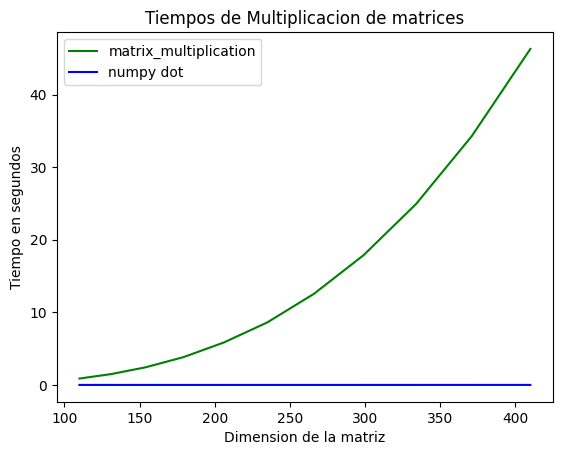

In [6]:
#Line chart
from matplotlib import pyplot as plt

dimensions = [i[0] for i in l_timings] 
time_matrix_multiplication = [i[1] for i in l_timings] 
time_dot = [i[2] for i in l_timings]

#Crear un gráfico de líneas
plt.plot(dimensions, time_matrix_multiplication, color= 'green', marker='none', linestyle = 'solid', label="matrix_multiplication")
plt.plot(dimensions, time_dot, color= 'blue', marker='none', linestyle = 'solid', label="numpy dot")

#Añadir un título al gráfico
plt.title("Tiempos de Multiplicacion de matrices")

#Añadir etiqueta al eje x y y (x-axis y y-axis)
plt.ylabel("Tiempo en segundos")
plt.xlabel("Dimension de la matriz")

#Mostrar
plt.legend(loc="upper left")
plt.show()

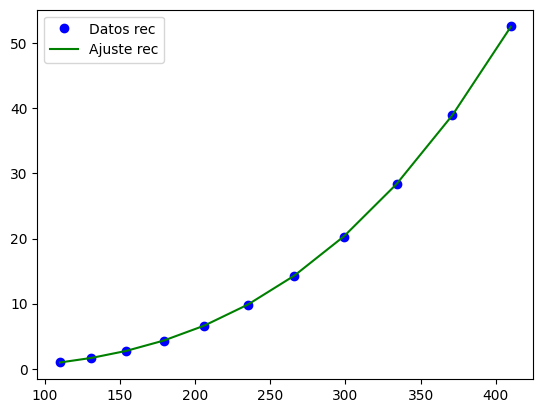

In [15]:
from scipy.optimize import curve_fit
import math

def tofit(x, a, b):
    return a * x ** 3 + b # f(x) = x**3 for matrix mult

l_timings = np.array(l_timings)

x = l_timings[: , 0]
y = l_timings[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
a, b = pars
plt.plot(x, y, 'o', label='Datos rec', color='blue')
plt.plot(x, tofit(x, a, b), label='Ajuste rec', color='green')
#plt.legend()
#plt.show()

# x1 = l_timings[: , 0]
# y1 = l_timings[: , 1]
# y1 = y1 / y1[0] #normalizar timings
# pars, _ = curve_fit(tofit, x1, y1)
# a, b = pars
# plt.plot(x1, y1, 'bo', label='Datos ite')
# plt.plot(x1, tofit(x1, a, b), label='Ajuste ite')
plt.legend()
plt.show()


## Min heap

In [66]:
def min_heapify(h: np.ndarray, i: int):
    smallest = i
    left = 2*i+1
    right = 2*i+2

    if left < len(h) and h[i] > h[left]:
        smallest = left
    if right < len(h) and h[smallest] > h[right]:
        smallest = right
    
    if smallest != i:
        h[i], h[smallest] = h[smallest], h[i]
        i = smallest
    else:
        return

def insert_min_heap(h: np.ndarray, k:int) -> np.ndarray:
    h = np.array(list(h) + [k])
    last = len(h) - 1

    while last > 0 and h[(last - 1) // 2] > h[last]:
        h[(last - 1) // 2], h[last] = h[last], h[(last - 1) // 2]
        last = (last - 1) // 2
    
    return h

def create_min_heap(h: np.ndarray):
    i = (len(h) - 1) // 2
    while i > -1:
        min_heapify(h, i)
        i -= 1
    
    return h

In [53]:
from typing import Tuple


def pq_ini() -> np.ndarray:
    return np.empty(0)

def pq_insert(h: np.ndarray, k: int) -> np.ndarray:
    return insert_min_heap(h, k)


def pq_remove(h: np.ndarray) -> Tuple[int, np.ndarray]:
    return h[0], create_min_heap(h[1:])

pq = pq_ini()

pq = pq_insert(pq, 2)
pq = pq_insert(pq, 17)
pq = pq_insert(pq, 63)
pq = pq_insert(pq, 32)
pq = pq_insert(pq, 10)
pq = pq_insert(pq, 9)
pq = pq_insert(pq, 25)
pq = pq_insert(pq, 29)
pq = pq_insert(pq, 30)
pq = pq_insert(pq, 13)
pq = pq_insert(pq, 47)
pq = pq_insert(pq, 1)
pq = pq_insert(pq, 6)
pq = pq_insert(pq, 35)
pq = pq_insert(pq, 12)

pq

value, pq = pq_remove(pq)

print(value, pq)


pq = pq_insert(pq, 1)

1 [ 2  6 12 13 10  9 25 30 17 47 63 29 35 32]


In [70]:
def min_heap_sort(h):
    ordered_h = []

    h = create_min_heap(h)

    while len(h) > 0:
        item, h = pq_remove(h)
        ordered_h.append(item)
    
    return np.array(ordered_h)

print(min_heap_sort(np.array([27,12,31,4,2,32,53,13,52,372,74537,1,95,88,64])))

[    1     2     4    12    13    27    31    32    52    53    64    88
    95   372 74537]


In [68]:
import math
from io import StringIO
#source https://bit.ly/38HXSoU
def show_tree(tree, total_width=60, fill=' '):
    """Pretty-print a tree.
    total_width depends on your input size"""
    output = StringIO()
    last_row = -1
    for i, n in enumerate(tree):
        if i:
            row = int(math.floor(math.log(i+1, 2)))
        else:
            row = 0
        if row != last_row:
            output.write('\n')
        columns = 2**row
        col_width = int(math.floor((total_width * 1.0) / columns))
        output.write(str(n).center(col_width, fill))
        last_row = row
    print (output.getvalue())
    print ('-' * total_width)
    return


[ 1  2  6  9 10 12 13 17 25 29 30 32 35 47 63]
[ 1  2  6  9 10 12 13 17 25 29 30 32 35 47 63]
